https://www.nasdaq.com/symbol/gs/historical

In [4]:
import pandas as pd
%matplotlib inline


In [2]:
# load required file, parse date and set index as date
df = pd.read_csv('HistoricalQuotes.csv',parse_dates=['date'],index_col='date')
df.head(5)

,close,volume,open,high,low
date,,,,,
2019-03-29,191.99,2632192.0,192.68,193.1050,191.14
2019-03-28,191.18,2332175.0,190.74,191.9086,189.29
2019-03-27,190.03,2335537.0,190.60,191.6100,188.74
2019-03-26,190.69,2909610.0,190.03,192.4100,188.69
2019-03-25,188.51,3751015.0,189.33,191.4500,186.50


In [3]:
# Remove index name
df.index.name = None
df.head()

,close,volume,open,high,low
2019-03-29,191.99,2632192.0,192.68,193.1050,191.14
2019-03-28,191.18,2332175.0,190.74,191.9086,189.29
2019-03-27,190.03,2335537.0,190.60,191.6100,188.74
2019-03-26,190.69,2909610.0,190.03,192.4100,188.69
2019-03-25,188.51,3751015.0,189.33,191.4500,186.50


In [4]:
#  this db 13march date is missing, Actually intead of date time is given, so it convert that time into today date
#  So, will apply date range to this df from 13 march 2019 to 12 march 2018
pd.date_range(start="2018-03-12",end="2019-03-13",freq='B')

DatetimeIndex(['2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23',
               ...
               '2019-02-28', '2019-03-01', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11',
               '2019-03-12', '2019-03-13'],
              dtype='datetime64[ns]', length=263, freq='B')

In [5]:
# this company is registered in USA, so its bussiness day will exclude USA holiday
# Lets confirm 
#  Martin Luther King, Jr. Day jan 21
df.loc['02-01-2019': '22-01-2019']

,close,volume,open,high,low
2019-02-01,196.54,3142186.0000,198.00,199.64,196.54
2019-01-31,198.01,5602776.0000,200.10,202.35,196.95
2019-01-30,202.48,2771723.0000,200.90,203.29,199.65
2019-01-29,200.50,2690807.0000,199.00,201.97,197.87
2019-01-28,199.72,2360245.0000,197.99,200.07,197.10
2019-01-25,200.74,3274971.0000,199.83,201.19,199.42
2019-01-24,197.80,2631804.0000,196.22,199.68,195.76
2019-01-23,196.90,3409876.0000,197.55,198.09,194.53
2019-01-22,197.68,4642483.0000,200.50,201.47,195.92


In [6]:
#Actual date range changed by new date range. So, we will change freq with us Fedral holiday list
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_calendar = CustomBusinessDay(calendar=USFederalHolidayCalendar())
new_date_range = pd.date_range(start="2018-03-12",end="2019-03-13", freq=us_calendar)
new_date_range

DatetimeIndex(['2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23',
               ...
               '2019-02-28', '2019-03-01', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11',
               '2019-03-12', '2019-03-13'],
              dtype='datetime64[ns]', length=253, freq='C')

In [7]:
# replace index with new one and date are from 2018 to 2019.So, will reverse date from 2019 to 2018 
df.set_index(new_date_range[::-1],inplace=True)
df.head()

,close,volume,open,high,low
2019-03-13,198.65,"324,639",197.89,198.9300,197.3900
2019-03-12,196.63,1976952.0000,196.00,197.3976,195.6900
2019-03-11,195.97,2663177.0000,197.23,198.9700,195.7300
2019-03-08,195.24,3162458.0000,190.40,195.7650,189.7118
2019-03-07,192.77,3567659.0000,193.13,193.4500,190.0800


In [19]:
df.to_csv('gs.csv')

In [8]:
# Lets  again confirm fedral holiday
#  Martin Luther King, Jr. Day jan 21
df.loc['02-01-2019': '22-01-2019']

,close,volume,open,high,low
2019-02-01,196.54,3142186.0000,198.00,199.64,196.54
2019-01-31,198.01,5602776.0000,200.10,202.35,196.95
2019-01-30,202.48,2771723.0000,200.90,203.29,199.65
2019-01-29,200.50,2690807.0000,199.00,201.97,197.87
2019-01-28,199.72,2360245.0000,197.99,200.07,197.10
2019-01-25,200.74,3274971.0000,199.83,201.19,199.42
2019-01-24,197.80,2631804.0000,196.22,199.68,195.76
2019-01-23,196.90,3409876.0000,197.55,198.09,194.53
2019-01-22,197.68,4642483.0000,200.50,201.47,195.92


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-03-13 to 2018-03-12
Freq: -1C
Data columns (total 5 columns):
close     253 non-null float64
volume    253 non-null object
open      253 non-null float64
high      253 non-null float64
low       253 non-null float64
dtypes: float64(4), object(1)
memory usage: 21.9+ KB


In [10]:
# Check weekend
if ((pd.DatetimeIndex(df.index).dayofweek // 5).any() == 1):
    print('we have weekend date also')
else:
    print('No Weekend date in df')

No Weekend date in df


In [11]:
# produce only one max value 
# df.loc[df['Close'].idxmax()]
df.loc[df['close'] == df['close'].max()]

,close,volume,open,high,low
2018-03-12,273.38,3065270.0000,271.0,275.31,270.77


In [12]:
# get minimum value
df.loc[df['close'] == df['close'].min()]

,close,volume,open,high,low
2018-12-24,156.35,3783497.0000,159.0,160.0,154.31


In [13]:
# get rows having lowest and highest 'close' value
df.loc[(df['close'] == df['close'].max() ) | (df['close'] == df['close'].min())]

,close,volume,open,high,low
2018-12-24,156.35,3783497.0000,159.0,160.00,154.31
2018-03-12,273.38,3065270.0000,271.0,275.31,270.77


In [14]:
# Average price of stock in month of March
df['2019-03'].close.mean()

196.02

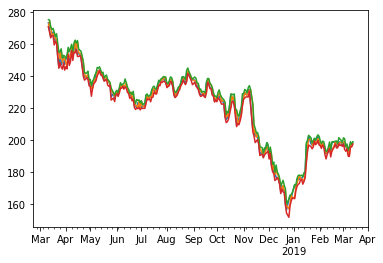

In [15]:
df['close'].plot()
df['open'].plot()
df['high'].plot()
df['low'].plot()

GS stock falls steeply between november to december.
https://www.marketwatch.com/story/goldman-sachs-stock-drops-toward-2-year-low-to-shave-about-26-points-off-dows-price-2018-12-17

In [16]:
# Convenience method for frequency conversion and resampling of time series.
# Get mean price of all month
df['close'].resample('M').mean()

2018-03-31    258.446667
2018-04-30    249.576667
2018-05-31    236.466364
2018-06-30    228.309524
2018-07-31    230.740952
2018-08-31    235.656957
2018-09-30    231.080000
2018-10-31    220.408636
2018-11-30    208.553000
2018-12-31    173.170000
2019-01-31    188.026190
2019-02-28    196.165789
2019-03-31    196.020000
Freq: M, Name: close, dtype: float64

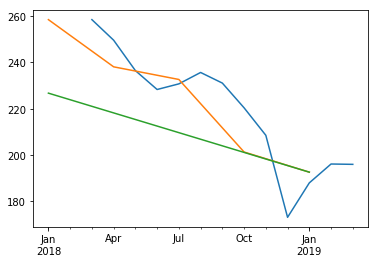

In [17]:
df['close'].resample('M').mean().plot()
df['close'].resample('Q').mean().plot()
df['close'].resample('A').mean().plot()

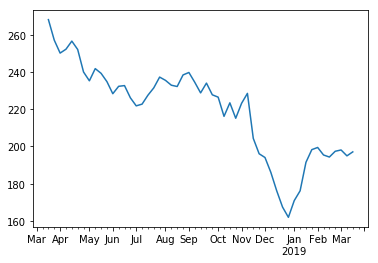

In [18]:
df['close'].resample('W').mean().plot()